# Lending Club Case Study

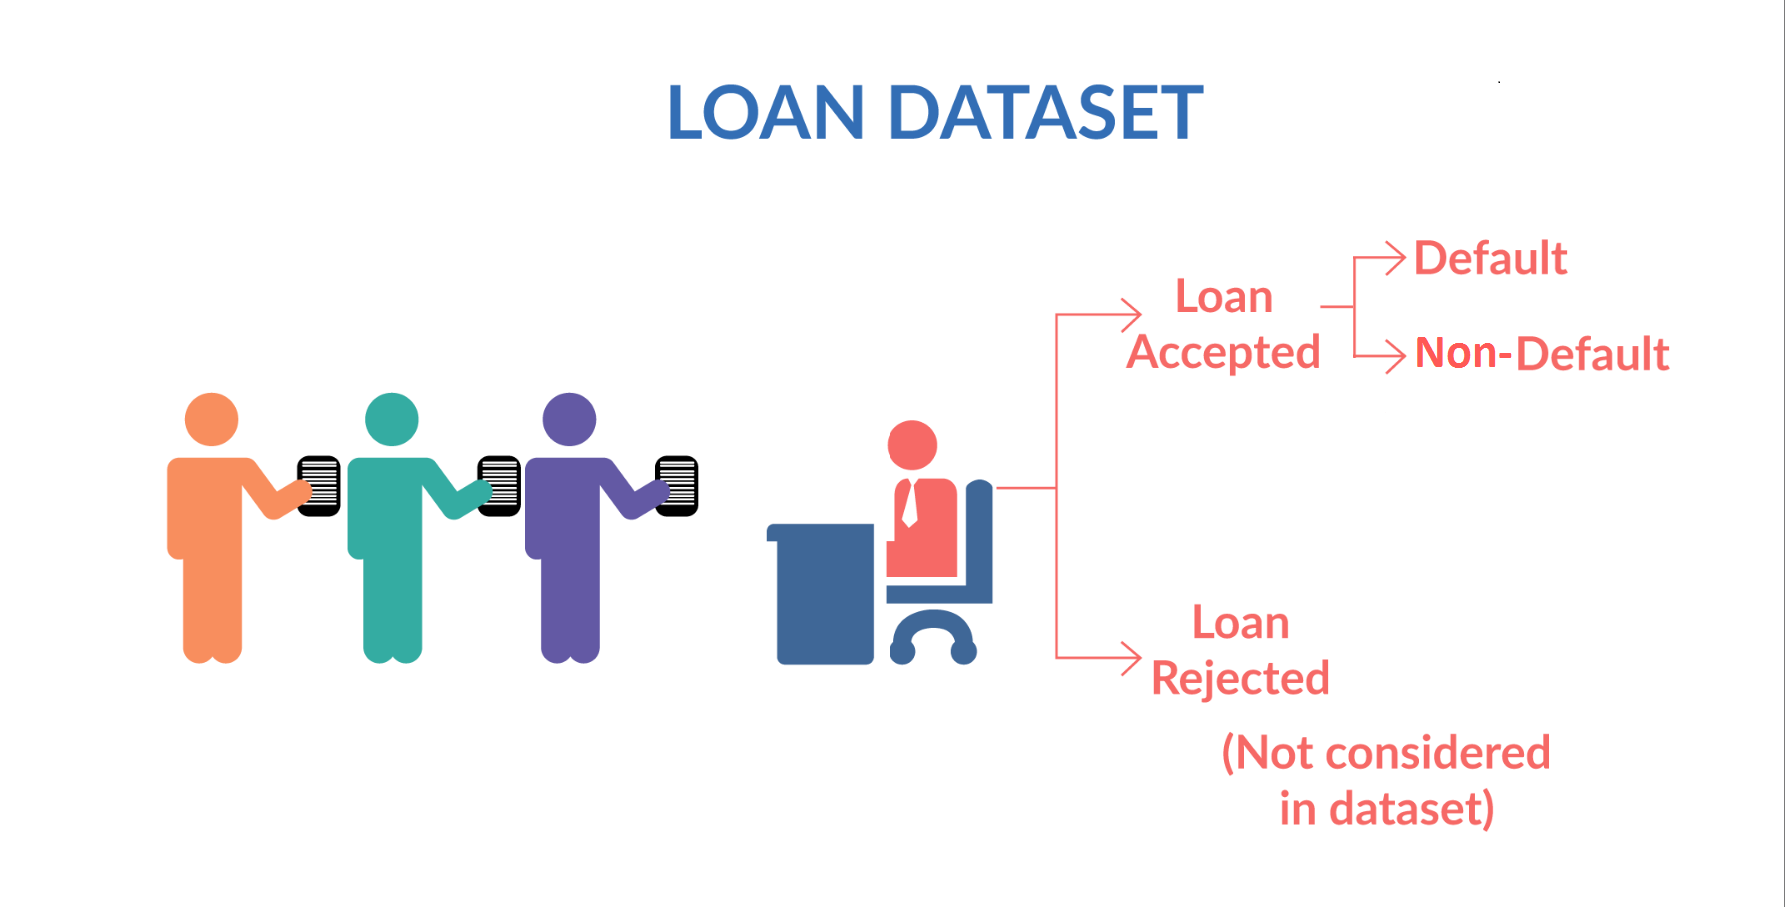

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

##### We are going to be perform below mentioned steps to address business problem statement:
1) Data Sourcing
2) Data Cleaning
3) Data Manipulation
4) Data Analysis
5) Conclusion

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtick

In [2]:
#To suppress warnings in Jupyter notebook
import warnings
warnings.filterwarnings('ignore')

#### Loading loan dataset from csv to dataframe

Using the dataframe loan_df, printing the first 5 rows

In [3]:
loan_df=pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Load dataframe information


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Checking empty columns in percentages


In [5]:
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

we can see above that we have numerous columns having 100% nulls present, I doubt these columns are not going to help us in anyway hence deleting them all.

#### drop all the columns which contains 100% Nan Data

In [6]:
loan_df.dropna(axis=1,how='all',inplace=True)
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

After dropping columns with 100% null values, we now have 3 columns ***next_pymnt_d***, ***mths_since_last_record*** and ***mths_since_last_delinq*** having null values percentage as 97, 93 and 65 percentage respectively.

They will also won't help us much hence deleting them as well below.

#### drop columns in which non data is very high in percentage


In [7]:
loan_df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### After checking columns above, let's perform check on rows which contains 100% empty data


In [9]:
round((100*loan_df.isnull().sum(axis=1))/len(loan_df.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

#### Let's findout unique value present in target column i.e. *loan_status*


In [10]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### dropping rows which have loan status as *Current* becuase they are ongoing and won't help us in analysis.


In [11]:
loan_status_list = ['Fully Paid','Charged Off']
loan_df=loan_df[loan_df['loan_status'].isin(loan_status_list)]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Manipulating loan status data into numerical data i.e. Fully Paid = 0 and Charged Off = 1


In [12]:
loan_df['loan_status']=loan_df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Extracting necessary columns which might impact the target columns i.e. Feature selection from above dataframe


In [13]:
loan_df=loan_df.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti')]
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


#### Adding year column using *issue_d* for future analysis


In [14]:
loan_df['year'] = loan_df['issue_d'].apply(lambda x:x.split('-')[1])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


#### Typecasting year column from string to integer


In [15]:
loan_df['year']=loan_df['year'].astype(np.int_)
type(loan_df['year'][0])

numpy.int32

#### Number of loans disbursed yearwise 


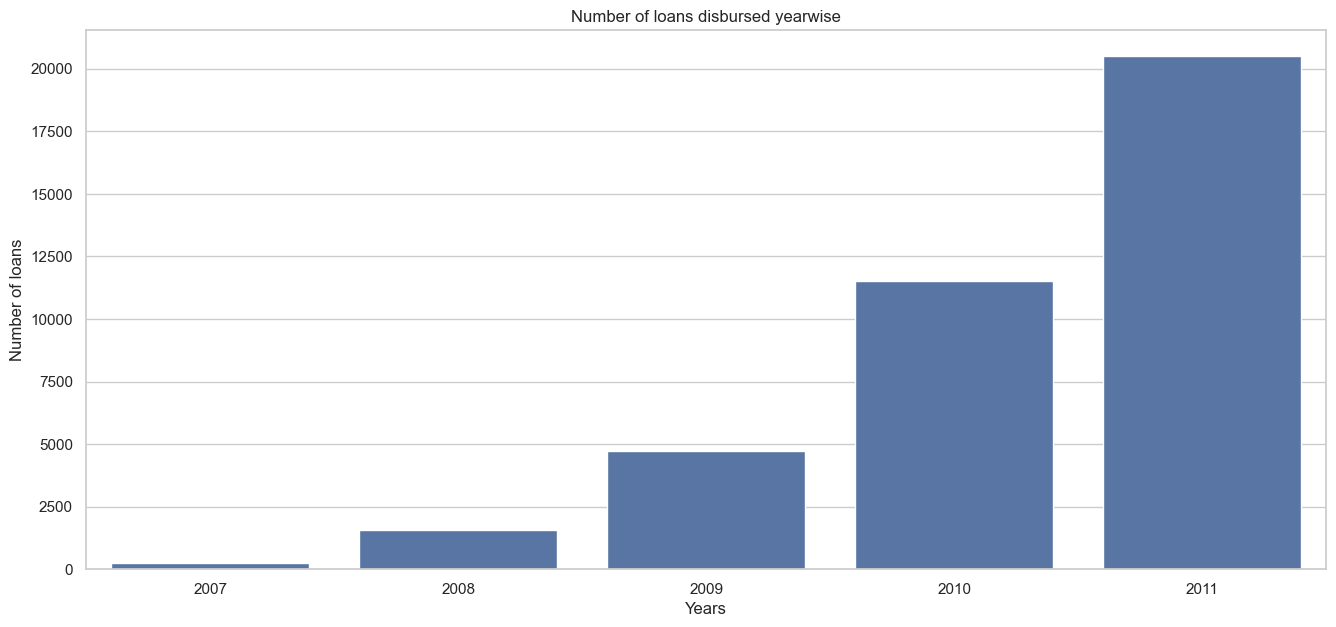

In [16]:
plt.figure(figsize=(16,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='year',data=loan_df)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Number of loans',title='Number of loans disbursed yearwise')
plt.xticks(xpos,years)
plt.show()

In this univariate analysis , We can clearly visualize there is substantial growth between 2007-2011 in the number of loan disbursed. 
Growth seems to be more than double from previous year approximately

#### Typecasting *int_rate* column from string to float


In [17]:
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','')
loan_df['int_rate']=loan_df['int_rate'].astype(np.float64)
type(loan_df['int_rate'][0])

numpy.float64

#### Adding month column using *issue_d* for future analysis


In [18]:
loan_df['month'] = loan_df['issue_d'].apply(lambda x:x.split('-')[0])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


## Count plot to show the different loan purpose from the lending clubs


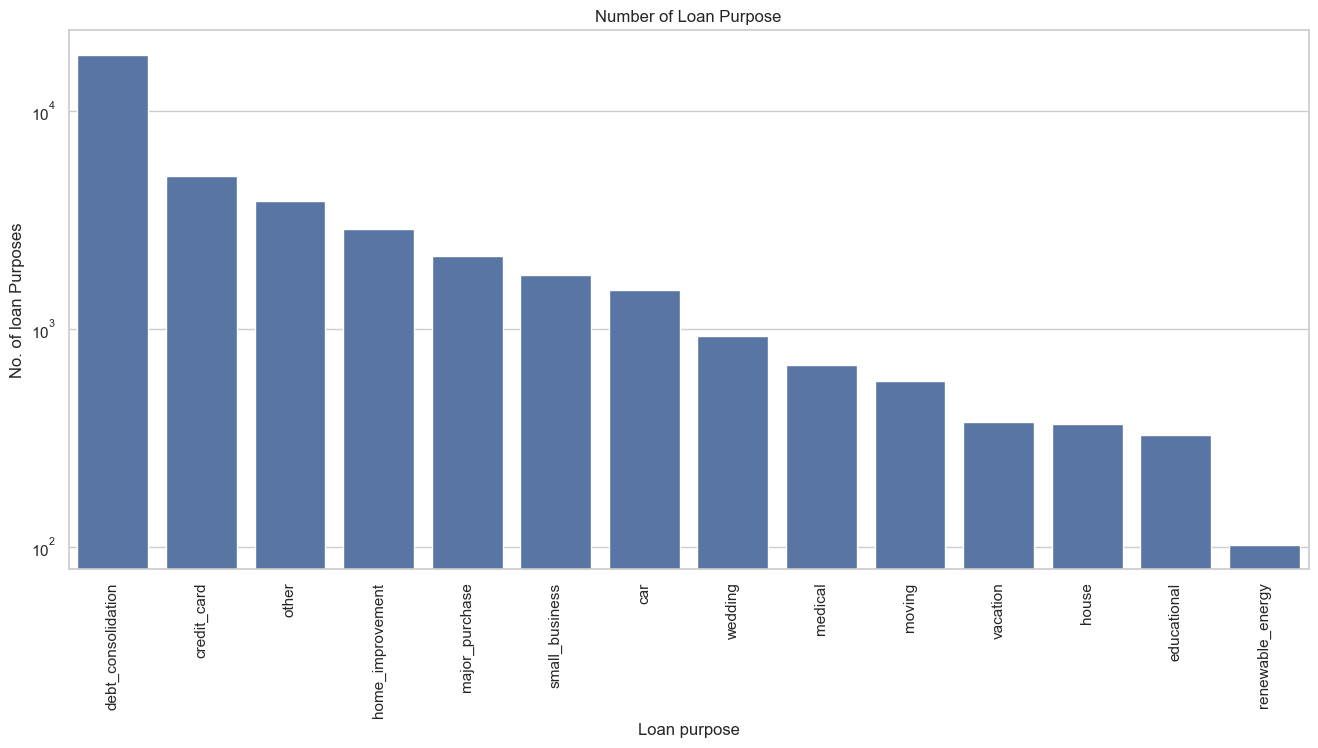

In [19]:
plt.figure(figsize=(16,7))
ax = sb.countplot(x='purpose',data=loan_df,order=loan_df['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Number of Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

It is clearly visible from count plot that top 7 purpose of large number of applicants taking out loan is **debt_consolidation**,**credit_card**, **other** , **home_improvement**, **major_purchase**, **small_business** & **car**

## Loan amount distribution 


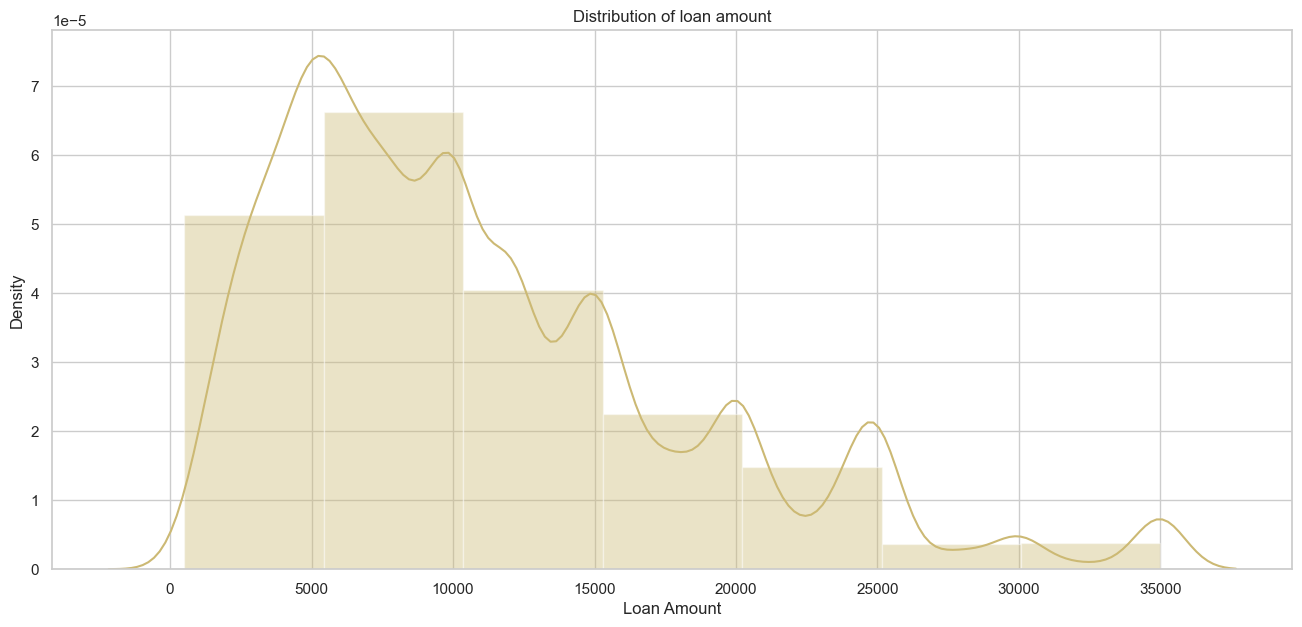

In [20]:
plt.figure(figsize=(16,7))
ax=sb.distplot(loan_df['loan_amnt'],bins=7,color='y')
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

The distribution of loan amount i.e the amount of loan applied can be visualized from the above plot . It has been observed that huge number of applicants apply loan in the range of **5-10k**.

#### creating an separate dataframe of defaulters named as defaulters_df


In [21]:
defaulters_df=loan_df.loc[loan_df['loan_status']==1]
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


## The percentage of loan defaulters according to grade


In [22]:
grade_df=pd.DataFrame(round((100*defaulters_df['grade'].value_counts())/loan_df['grade'].value_counts(),2))
grade_df.rename(columns={'count':'defaulter_perc'},inplace=True)
grade_df

,defaulter_perc
grade,
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


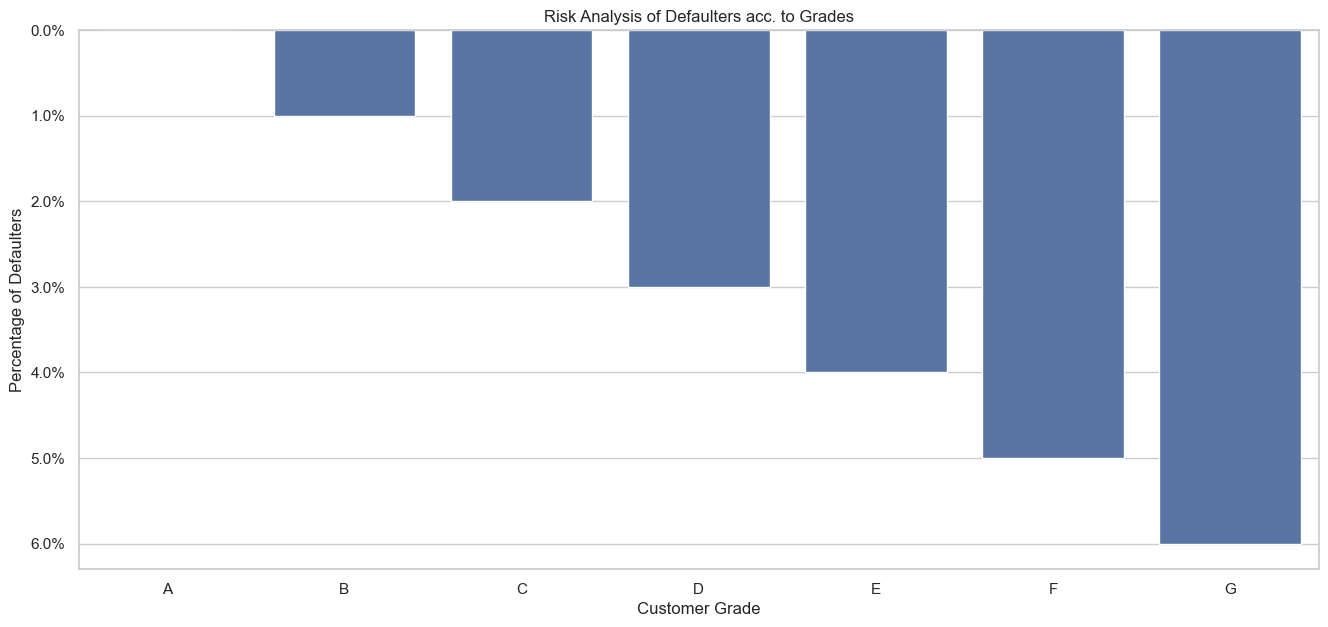

In [23]:
plt.figure(figsize=(16,7))
ax=sb.barplot(x=grade_df.index,y='grade',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The percentage of Defaulters is the highest in Grade G group


## Percentage of loan defaulters according to loan purpose


In [24]:
purpose_df=pd.DataFrame(data=round((100*defaulters_df['purpose'].value_counts())/loan_df['purpose'].value_counts(),2))
purpose_df.rename(columns={'count':'defaulter_perc'},inplace=True)
purpose_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
purpose_df

,defaulter_perc
purpose,
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13


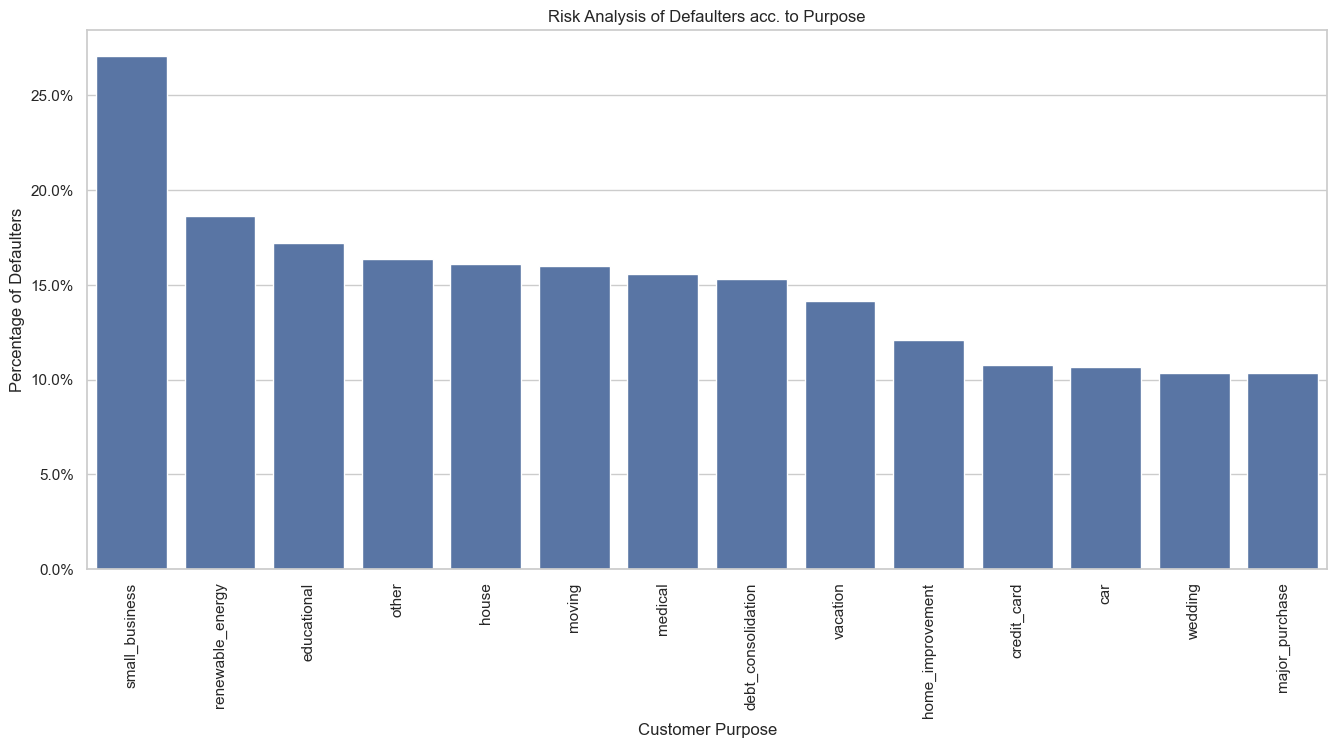

In [25]:
plt.figure(figsize=(16,7))
ax=sb.barplot(x=purpose_df.index,y='defaulter_perc',data=purpose_df)
ax.set(xlabel='Customer Purpose', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

The percentage of risk of Defaulters is the largest in the Loan Purpose – ‘small_business’ , followed by ‘renewable_energy’ , ‘educational’ and so on.

## Percentage of loan defaulters according to Employee experience


In [26]:
emp_df=pd.DataFrame(data=round((100*defaulters_df['emp_length'].value_counts())/loan_df['emp_length'].value_counts(),2))
emp_df.rename(columns={'count':'defaulter_perc'},inplace=True)
emp_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
emp_df

,defaulter_perc
emp_length,
10+ years,15.68
7 years,15.37
1 year,14.39
5 years,14.34
< 1 year,14.17
6 years,14.16
8 years,14.15
3 years,13.83
4 years,13.82


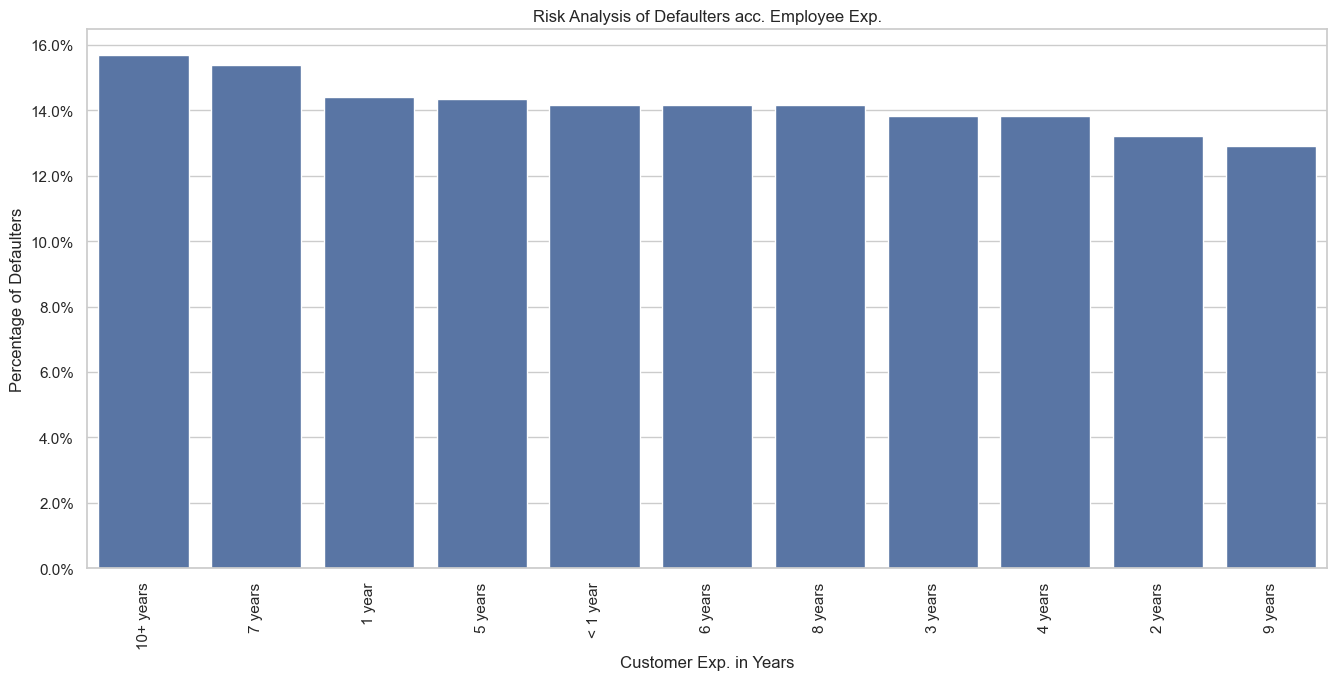

In [27]:
plt.figure(figsize=(16,7))
ax=sb.barplot(x=emp_df.index,y='defaulter_perc',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

Customers having 10+ years of experience have defaulted highest while least is 9 years of exiperience.

## Percentage of loan defaulters according to home ownership


In [28]:
home_df=pd.DataFrame(data=round((100*defaulters_df['home_ownership'].value_counts())/loan_df['home_ownership'].value_counts(),2))
home_df.rename(columns={'count':'defaulter_perc'},inplace=True)
home_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,defaulter_perc
home_ownership,
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


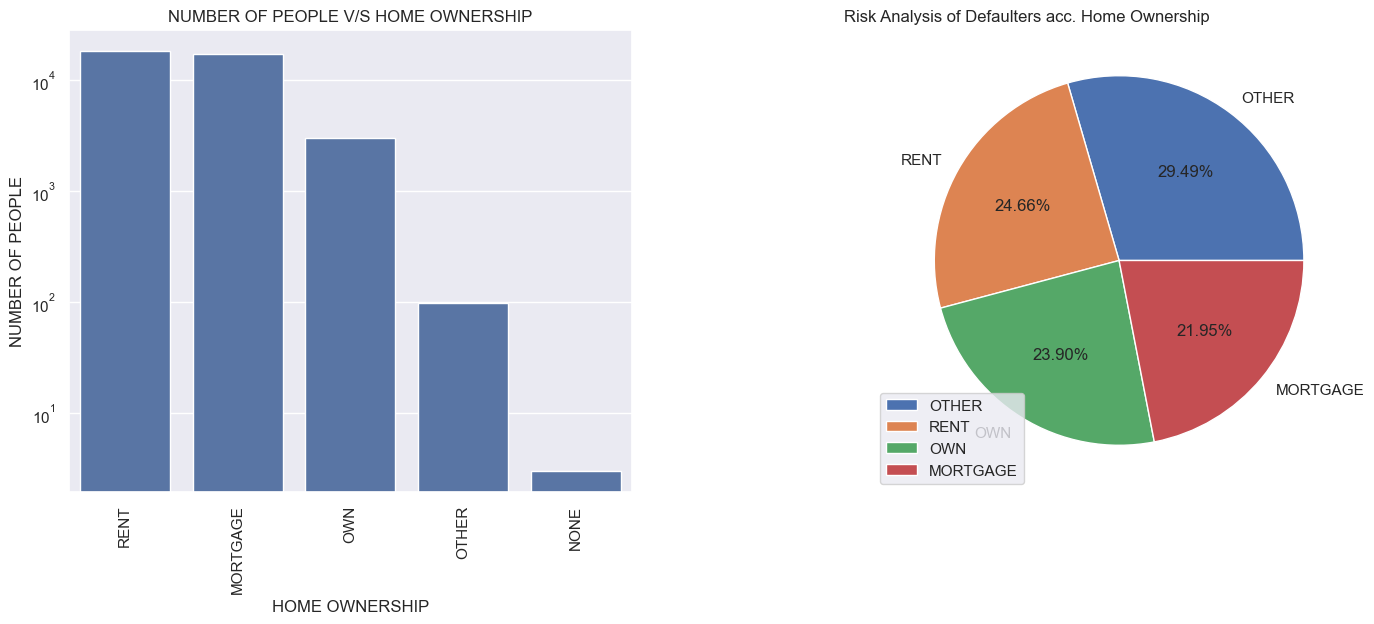

In [29]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.countplot(x='home_ownership',data=loan_df,order=loan_df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1, 2, 2)
plt.pie(home_df['defaulter_perc'], labels = home_df.index,autopct='%.2f%%')
ax=sb.barplot(x=home_df.index,y='defaulter_perc',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()


1. The number of people who have home ownership - “Rent” is highest(with very slim margin when compared to Mortgage)

2. The highest percentage of defaulter under home ownership is “Other” followed by “Rent” and “Own” and “Mortgage”


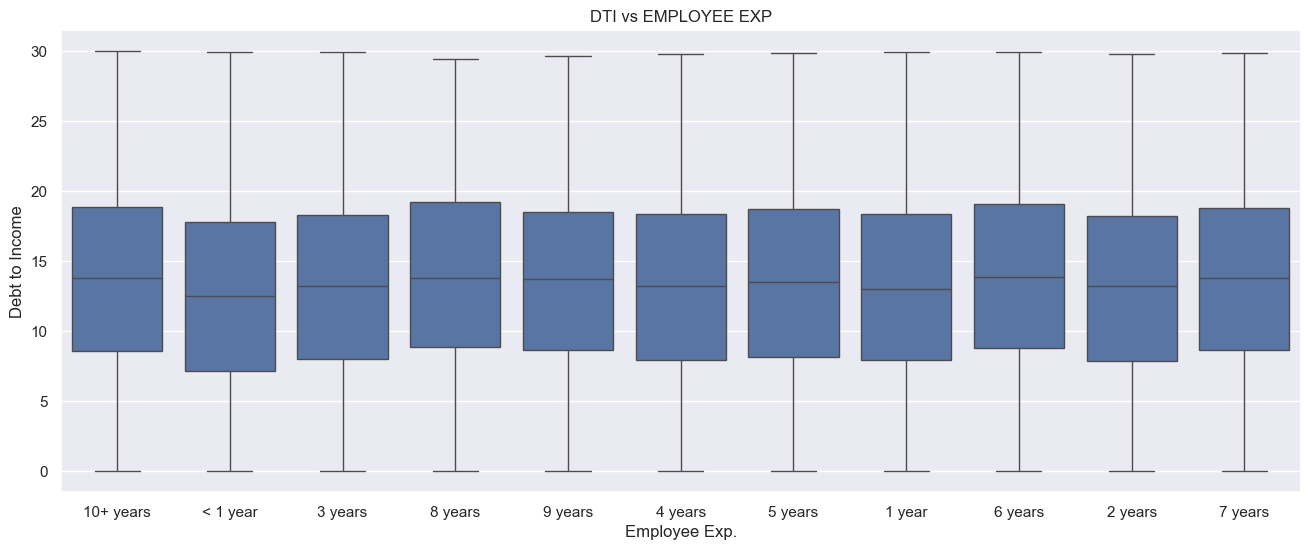

In [30]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

By doing bivariate analysis it can been observed that 10+ years of employee exp. is having debt to income in maximum range, for all others year of employee exp. are more or less in same range.

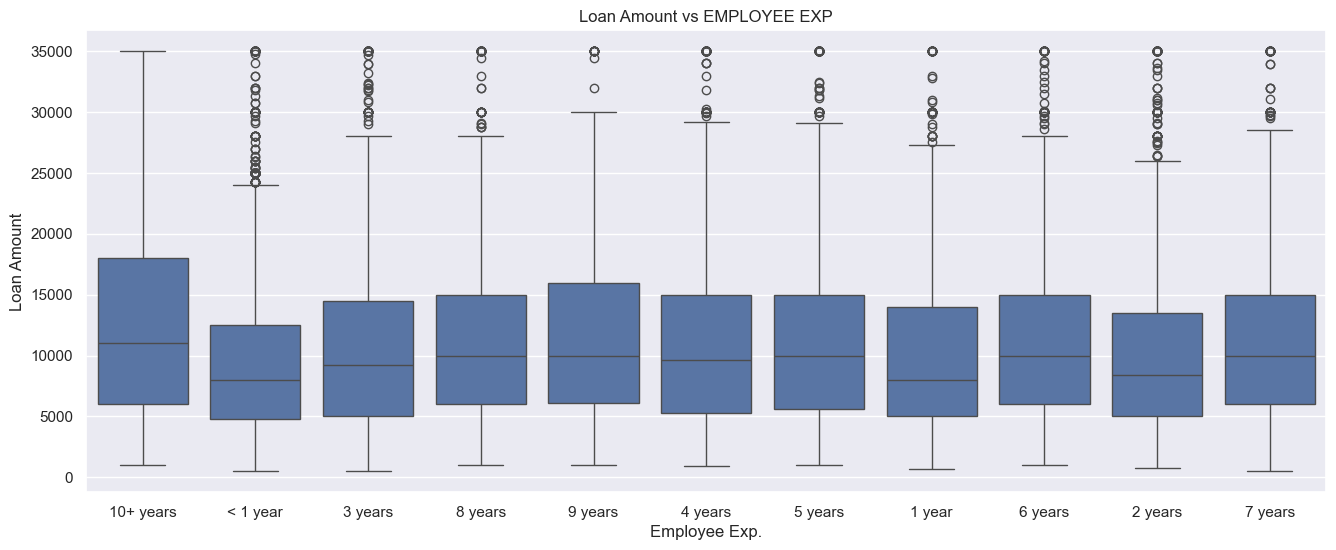

In [31]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='loan_amnt',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

By doing bivariate analysis it can been observed that employee with exp. 10+ years is taking more amount of loan and on the reverse side those who have less than 1 year is taking less amount of loan.


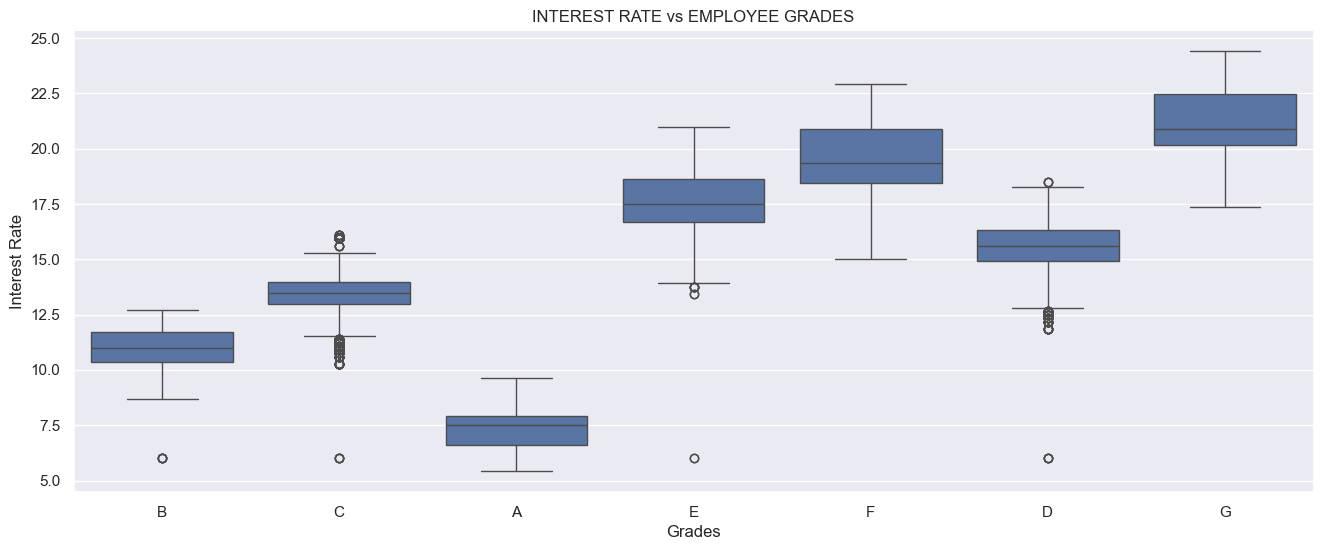

In [32]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='int_rate',data=loan_df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

From the above plot it has been visualize that – “A” is having minimum interest rate, whereas “G” is having higher interest rate.

In [33]:
grade_group = loan_df.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [34]:
emp_group = loan_df.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
1 year        8000.0
10+ years    11000.0
2 years       8400.0
3 years       9225.0
4 years       9600.0
5 years      10000.0
6 years      10000.0
7 years      10000.0
8 years      10000.0
9 years      10000.0
< 1 year      8000.0
Name: loan_amnt, dtype: float64

## Percentage of loan defaulters according to address of a state


In [35]:
state_df=pd.DataFrame(data=round((100*defaulters_df['addr_state'].value_counts())/loan_df['addr_state'].value_counts(),2))
state_df.rename(columns={'count':'defaulter_perc'},inplace=True)
state_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
state_df=state_df.head(10)
state_df

,defaulter_perc
addr_state,
NE,60.00
NV,22.55
SD,19.35
AK,19.23
FL,18.12
MO,17.01
HI,16.87
ID,16.67
NM,16.39


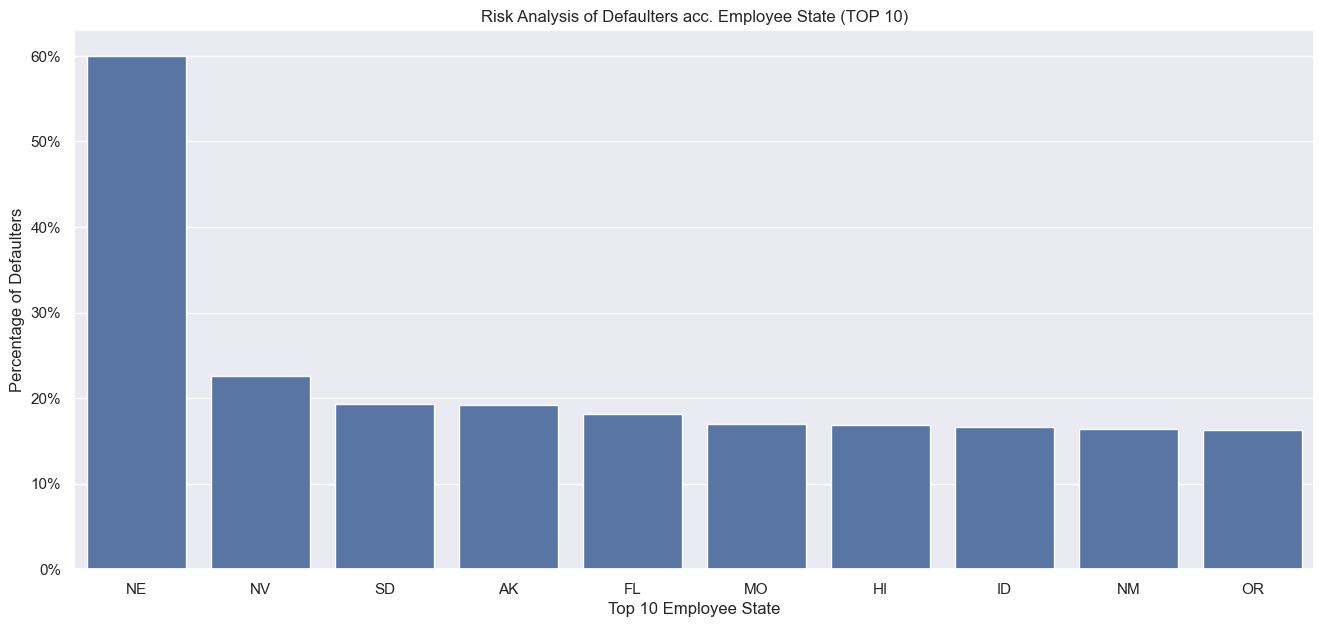

In [36]:
plt.figure(figsize=(16,7))
ax=sb.barplot(x=state_df.index,y='defaulter_perc',data=state_df)
ax.set(xlabel='Top 10 Employee State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee State (TOP 10)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The percentage of Defaulters is maximum from NE (address) which is 60%


## Percentage of loan defaulters according to term


In [37]:
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loan_df['term'].value_counts(),2))
term_df.rename(columns={'count':'defaulter_perc'},inplace=True)
term_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_df

,defaulter_perc
term,
60 months,25.31
36 months,11.09


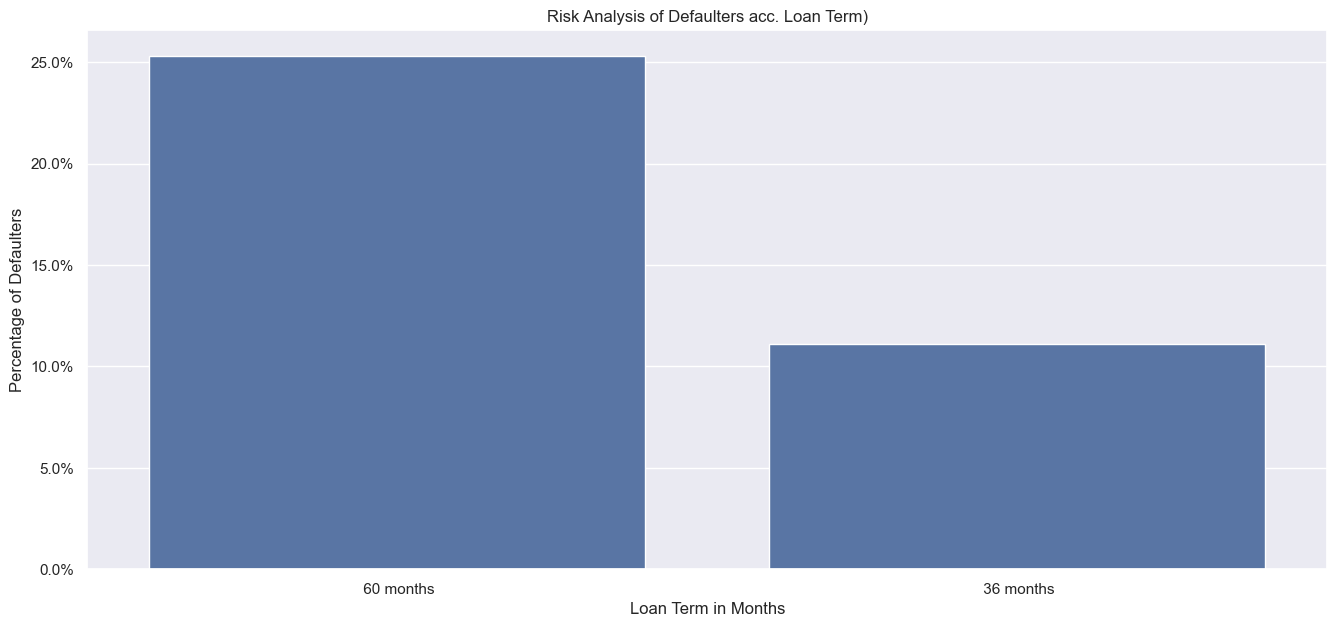

In [38]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='defaulter_perc',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The percentage of Defaulters is found in 60 months as compared to 36 months – Loan Term

## Conclusions


1. Debt Consolidation is the most common loan purpose, but Small Business Loans have the highest default risk, with Renewable Energy and Educational Loans also showing significant, though lower, risk. Understanding these varying risks can help in better managing defaults.
2. Most loans are between 5000 and 10000 dollars. Borrowers with 10+ years of experience apply for larger loans and have higher debt-to-income ratios, while less experienced borrowers typically request smaller amounts. This suggests a correlation between borrower experience and loan size.
3. Grade G borrowers have the highest default rates, while interest rates rise with loan grades from Grade A to Grade G. Lower-grade loans are riskier, so adjusting policies based on loan grades can improve risk management.
4. Borrowers with 'Other' home ownership status have the highest default rates, followed by renters. Homeowners (Own and Mortgage) generally have lower default rates. Analyzing home ownership status helps assess borrower stability and default risk.
5. 60-month loans have higher default rates than 36-month loans, with longer terms linked to increased risk. Shorter-term loans generally perform better, suggesting that re-evaluating loan term policies could help reduce defaults.